In [2]:
import sklearn

In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [33]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df.drop(['sepal length (cm)','sepal width (cm)'], axis= 'columns', inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


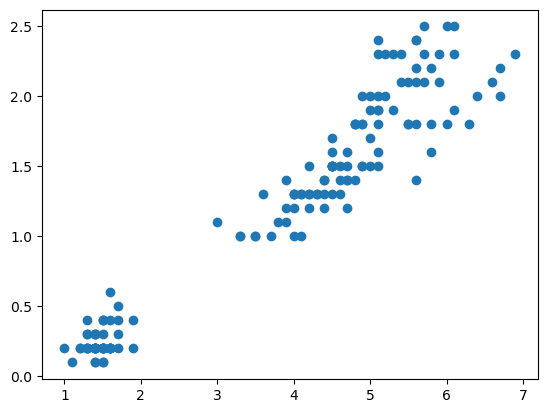

In [18]:
from matplotlib import pyplot as plt
plt.scatter(df[['petal length (cm)']],df[['petal width (cm)']])

In [34]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=4)
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])

C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
df['Cluster']=y_predicted
df

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,3
147,5.2,2.0,2
148,5.4,2.3,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


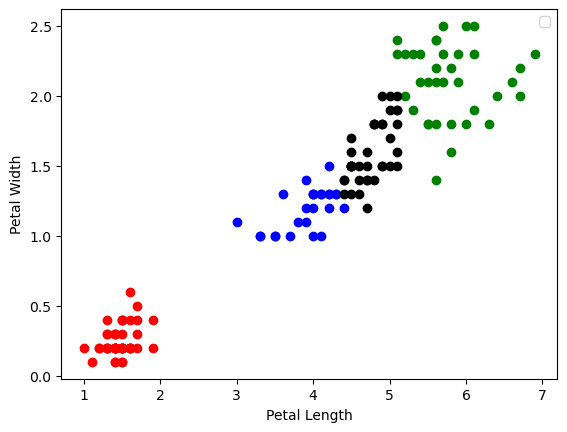

In [38]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]

plt.scatter(df1[['petal length (cm)']],df1[['petal width (cm)']], color='blue')
plt.scatter(df2[['petal length (cm)']],df2[['petal width (cm)']], color='red')
plt.scatter(df3[['petal length (cm)']],df3[['petal width (cm)']], color='green')
plt.scatter(df4[['petal length (cm)']],df4[['petal width (cm)']], color='black')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']])

In [42]:
km= KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])

C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
km= KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])

C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [47]:
x= km.cluster_centers_
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.695462  , 0.68548387],
       [0.82234777, 0.88425926],
       [0.53430186, 0.4890873 ]])

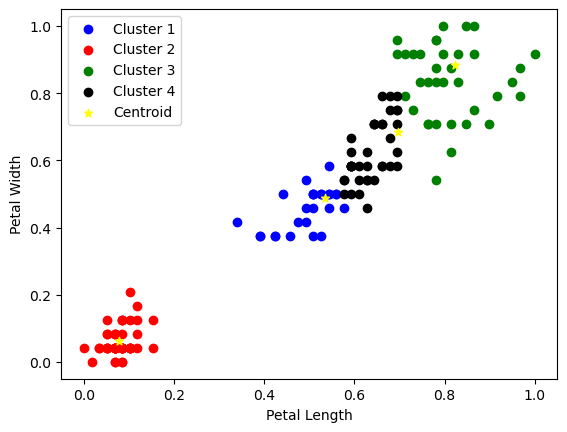

In [52]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]

plt.scatter(df1[['petal length (cm)']],df1[['petal width (cm)']], color='blue', label='Cluster 1')
plt.scatter(df2[['petal length (cm)']],df2[['petal width (cm)']], color='red', label='Cluster 2')
plt.scatter(df3[['petal length (cm)']],df3[['petal width (cm)']], color='green', label='Cluster 3')
plt.scatter(df4[['petal length (cm)']],df4[['petal width (cm)']], color='black', label='Cluster 4')
plt.scatter(x[:,0], x[:,1], color='yellow', marker='*', label='Centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

In [56]:
sse=[]
krang=range(1,10)
for i in krang:
    km=KMeans(n_clusters=i)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)
sse

C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1611128497903633,
 0.8538617353912239,
 0.6801035704886195,
 0.565127345570398,
 0.4925856684302083,
 0.4366030461145208]

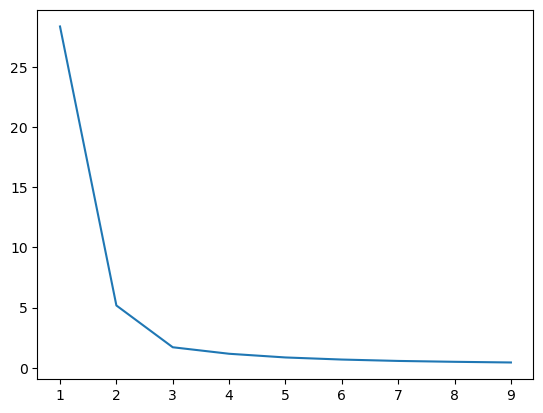

In [57]:
plt.plot(krang, sse)

In [58]:
km= KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])

C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fadib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [59]:
df['Cluster']=y_predicted
df

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [60]:
x= km.cluster_centers_
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

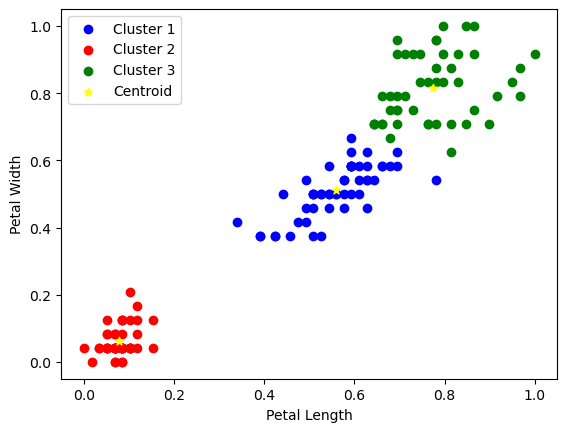

In [61]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

plt.scatter(df1[['petal length (cm)']],df1[['petal width (cm)']], color='blue', label='Cluster 1')
plt.scatter(df2[['petal length (cm)']],df2[['petal width (cm)']], color='red', label='Cluster 2')
plt.scatter(df3[['petal length (cm)']],df3[['petal width (cm)']], color='green', label='Cluster 3')
plt.scatter(x[:,0], x[:,1], color='yellow', marker='*', label='Centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()